#Kasus Rain Tomorrow

##1. Data Preparation

###1. Loading Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
cuaca_aus = pd.read_csv('/Users/newuser/ali/project/kampus merdeka/hacktiv8/repo/weatherAUS.csv')
cuaca_aus.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [5]:
cuaca_aus.shape

(142193, 24)

###2. Get information from the data

In [6]:
cuaca_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
# '''
# Drop variabel Date

# '''

# drop_columns = cuaca_aus.drop(['Date'], axis = 1)
# cuaca_aus = drop_columns
# cuaca_aus.shape

####2.1 Checking Missing Value

In [7]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(cuaca_aus.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(cuaca_aus)).round(2)*100
mv

,No. of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,637,0.0
MaxTemp,322,0.0
Rainfall,1406,1.0
Evaporation,60843,43.0
Sunshine,67816,48.0
WindGustDir,9330,7.0
WindGustSpeed,9270,7.0
WindDir9am,10013,7.0


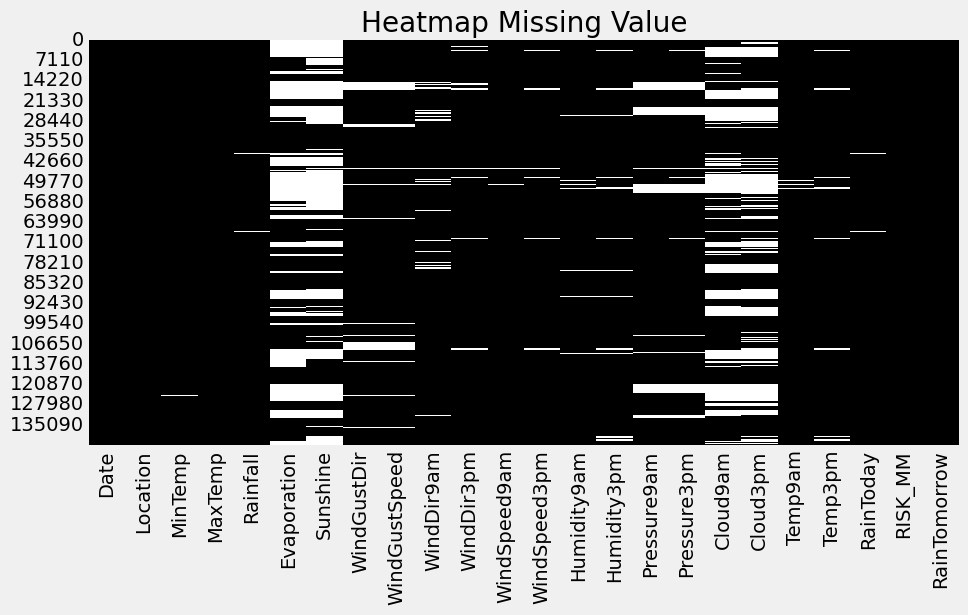

In [9]:
'''
Visualisasi missing value seluruh variabel pada dataset yang digunakan.
Warna putih mengindikasikan missing value.

'''
plt.figure(figsize=(10,5))
sns.heatmap(cuaca_aus.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()


####2.2 Handling Missing Value

* Pada variabel Sunshine mengandung missing value dengan presentase menginjak 50% (tepatnya 48%) dari total dataset yang dimiliki. Saya memutuskan untuk menghapus/drop variabel Sunshine dari dataset. Menurut saya variabel yang mengandung missing value diatas 45% presentase-nya sudah tidak tepat jika di imputasi dengan nilai mean/median, dikarenakan jika diisi dengan nilai melalui pendekatan pada data yang ada di variabel tersebut, akibatnya sejumlah besar data berisi nilai yang tidak tepat/sesuai dengan fakta yang ada di lapangan. Yang mana akan mempengaruhi performa model, jika model dilatih dengan data yang tidak tepat dalam jumlah yang banyak. Juga variabel sunshine tidak memiliki pengaruh yang begitu besar dalam proses terjadinya hujan.
* Variabel MinTemp dan MaxTemp, saya memutuskan untuk menghapus/drop kedua variabel tersebut. Dikarenakan jika diimputasi dengan nilai melalui pendekatan pada data yang ada di kedua variabel tersebut, akibatnya terjadi ketidak sesuaian data, karena nilai pada variabel MinTemp dan MaxTemp dtentukan berdasarkan nilai yang ada variabel Temp9am dan Temp3pm.

In [10]:
'''
Drop variabel Sunshine, MinTemp dan MaxTemp

'''

drop_columns = cuaca_aus.drop(['Sunshine', 'MinTemp', 'MaxTemp'], axis = 1)
cuaca_aus = drop_columns
cuaca_aus.shape

(142193, 21)

*   Pada variabel Evaporation, Cloud9am dan Cloud3pm mengandung missing value dengan presentase diatas 38%. Saya memutuskan untuk mengimputasi ketiga variabel ini dengan nilai mean/median disesuaikan dengan distribusi datanya. Dikarenakan nilai yang dikandung dalam ketiga variabel (Evaporasi, keadaan awan di pagi dan sore hari) ini merupakan nilai yang penting karena merupakan faktor penentu yang terlibat langsung dalam proses terjadinya hujan.
* RainFall, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm mengandung missing value dengan presentase di bawah 10%

IMPUTASI AKAN DILAKUKAN PADA PART PREPROCESSING DATA SETELAH DATA DI SPLIT

In [11]:
target = ['RainTomorrow']
cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
num_cols = [i for i in cuaca_aus.columns if i not in (target + cat_cols)]

##2. Data Exploring/Exploratory Data Analysis (EDA)

###2.1 Visualize Fitur Target

<Axes: ylabel='RainTomorrow'>

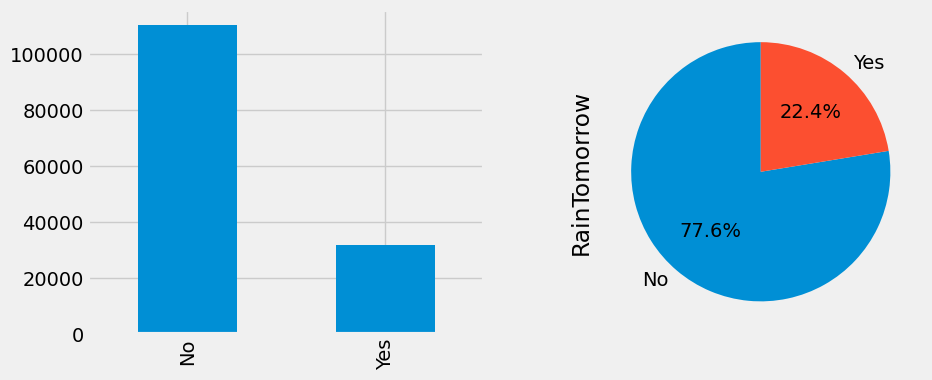

In [12]:
'''
Visualisasi variabel target (RainTomorrow)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
cuaca_aus['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
cuaca_aus['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

*   Target dari variabel RainTomorrow memiliki 2 value, yaitu Yes and No
*   77.8% dari hasilnya adalah No, dan 22.2% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu dihandle sebelum masuk ke train model

###2.2 Exploring The Data

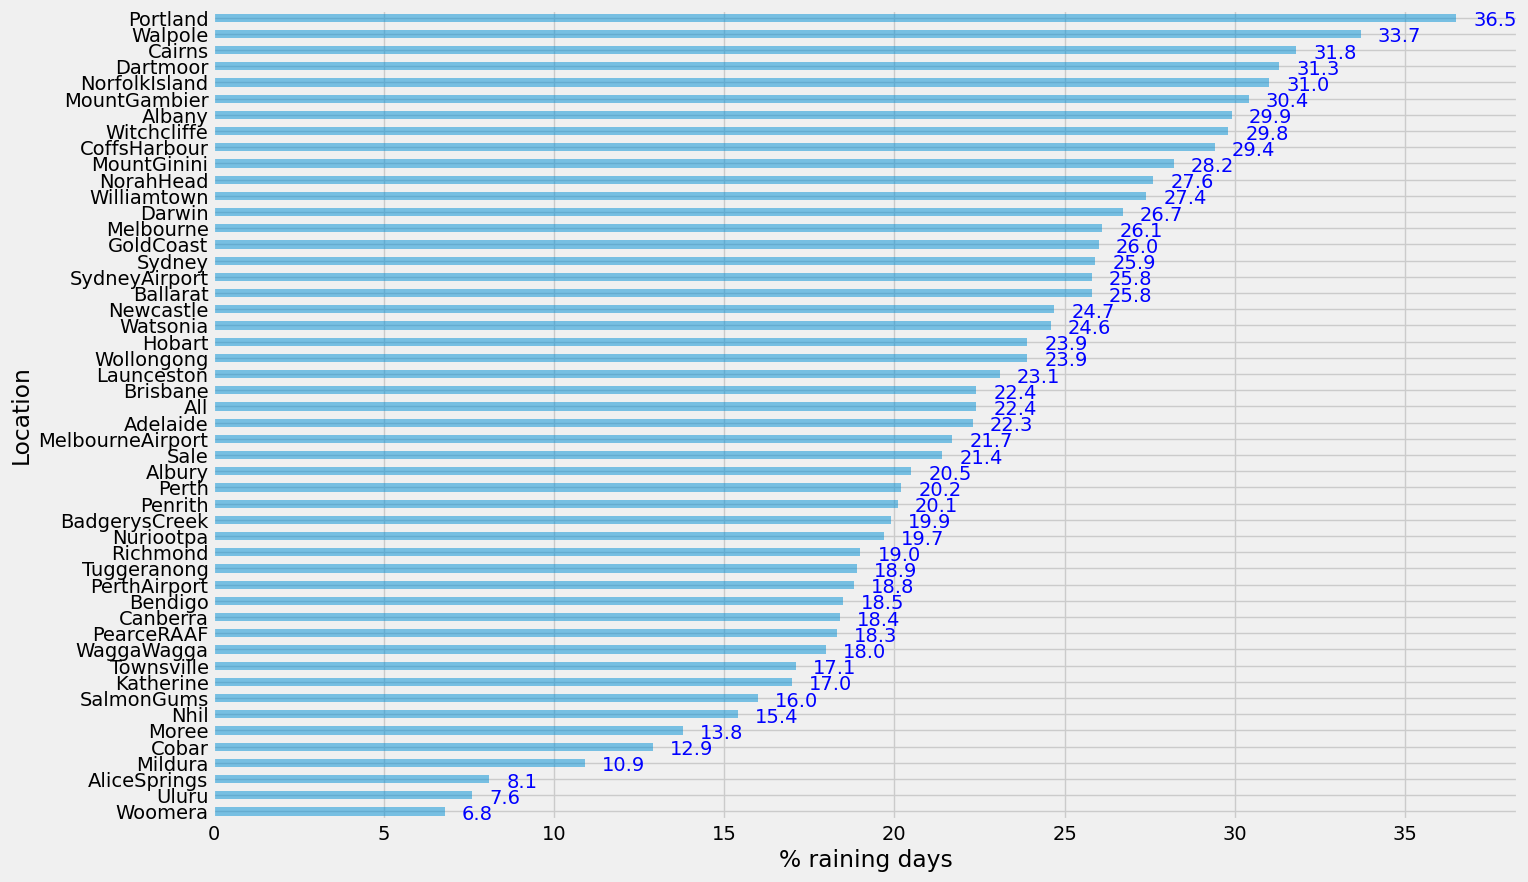

In [13]:
'''
Kota mana yang intensitas hujannya lebih sering?

'''

#rain_by_location =rain.groupby('Location')['RainTomorrow'].count()/rain['Location'].count()
rain_by_location = pd.crosstab(index=cuaca_aus['Location'], columns=cuaca_aus['RainTomorrow'], values=cuaca_aus['RainTomorrow'], aggfunc='count', margins=True)
rain_by_location['% Yes'] = (rain_by_location['Yes']/rain_by_location['All']).round(3)*100
# rain_by_location.sort_values(by='% Yes', ascending=False)
f, ax = plt.subplots(figsize=(15,10))
rain_by_location['% Yes'].sort_values().plot(kind='barh', alpha=0.5)
ax.set_xlabel ('% raining days')

# Label values
y = rain_by_location['% Yes'].sort_values().values
for h, v in enumerate(y):
    ax.text(v+0.5 , h-0.5 , round(float(v),1), color='blue')

*   Kota dengan intensitas hujan lebih sering adalah **Portland**
*   Kota dengan intensitas hujan terendah adalah **Woomera**

<Axes: xlabel='Humidity9am', ylabel='Pressure9am'>

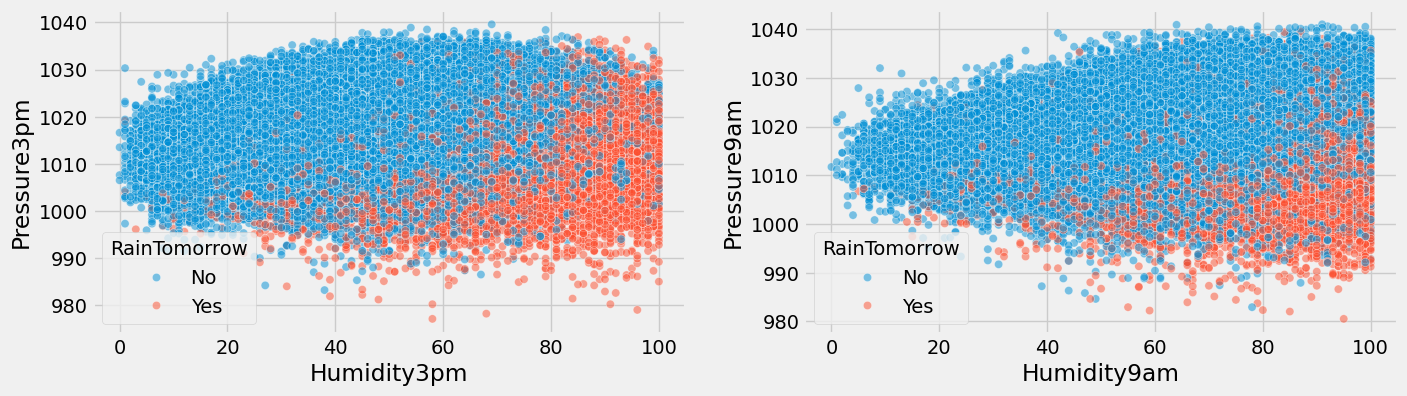

In [14]:
'''
Visualisasi hubungan antara kelembapan, tekanan dan hujan di besok hari

'''

fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Humidity3pm', y='Pressure3pm', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Humidity9am', y='Pressure9am', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[1])

Dari hasil visualisasi tampaknya peluang turunnya hujan di besok hari semakin besar jika kelembapannya tinggi dan tekanannya rendah

<Axes: xlabel='Evaporation', ylabel='Cloud3pm'>

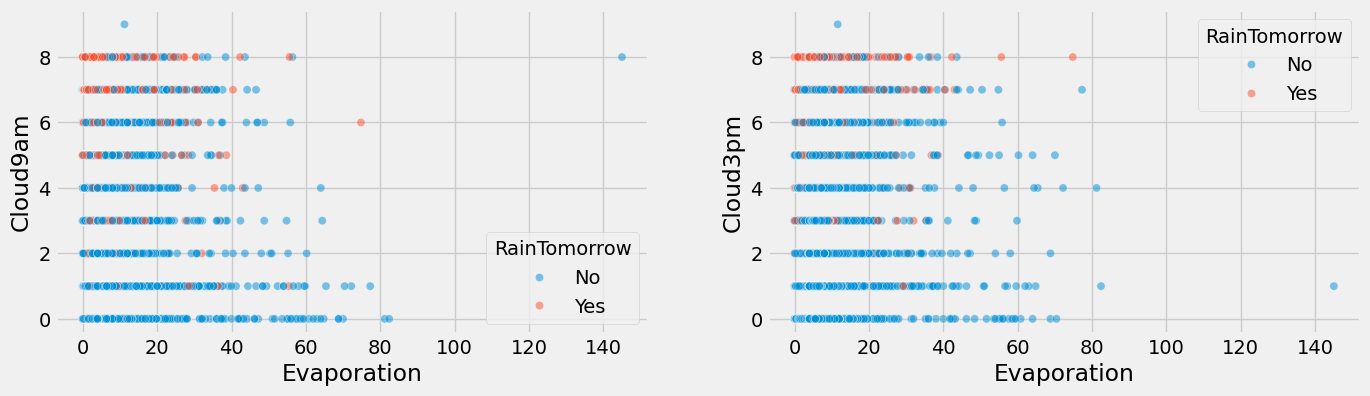

In [15]:
'''
Visualisasi hubungan antara kelembapan, tekanan dan hujan di besok hari

'''

fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Evaporation', y='Cloud9am', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Evaporation', y='Cloud3pm', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[1])

Dari hasil visualisasi tampaknya peluang turunnya hujan di besok hari semakin besar jika Evaporasi tinggi dan Banyaknya gumpalan awan juga tinggi

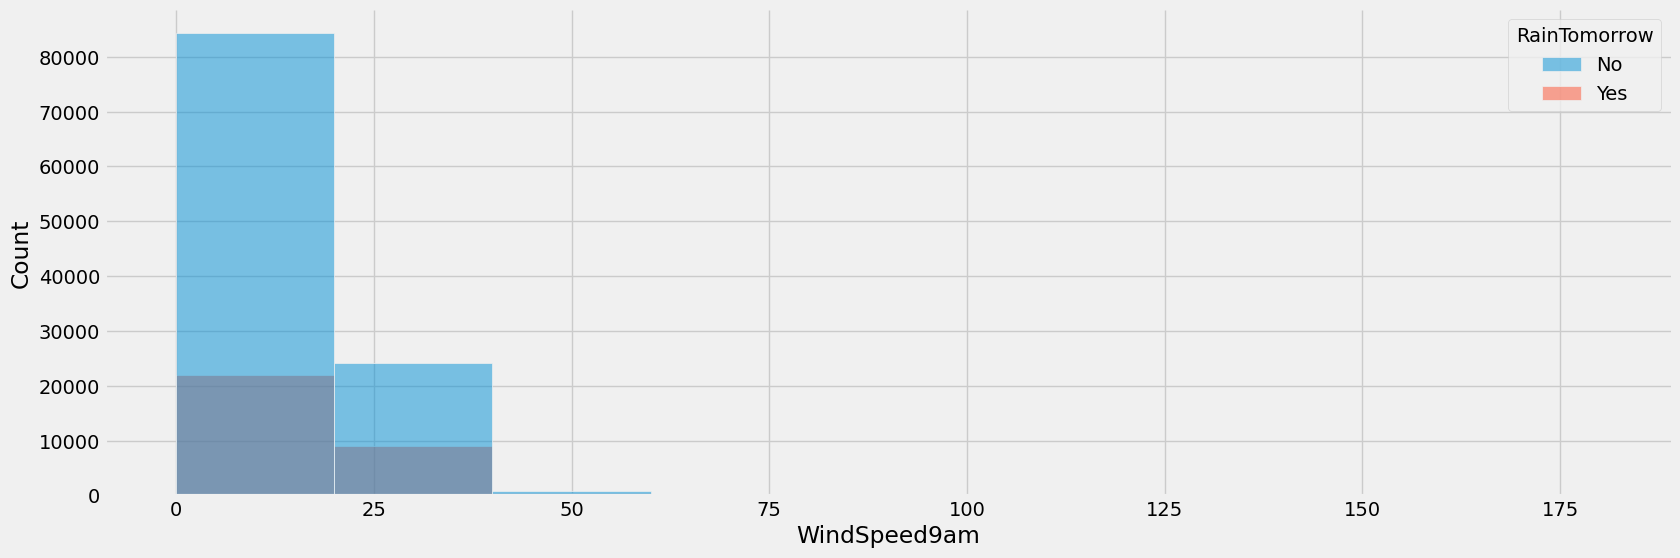

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plt.figure(figsize=(18, 6))
sns.histplot(data=cuaca_aus, x="WindSpeed9am", bins=bins, hue="RainTomorrow");
sns.despine(top=True, right=True)

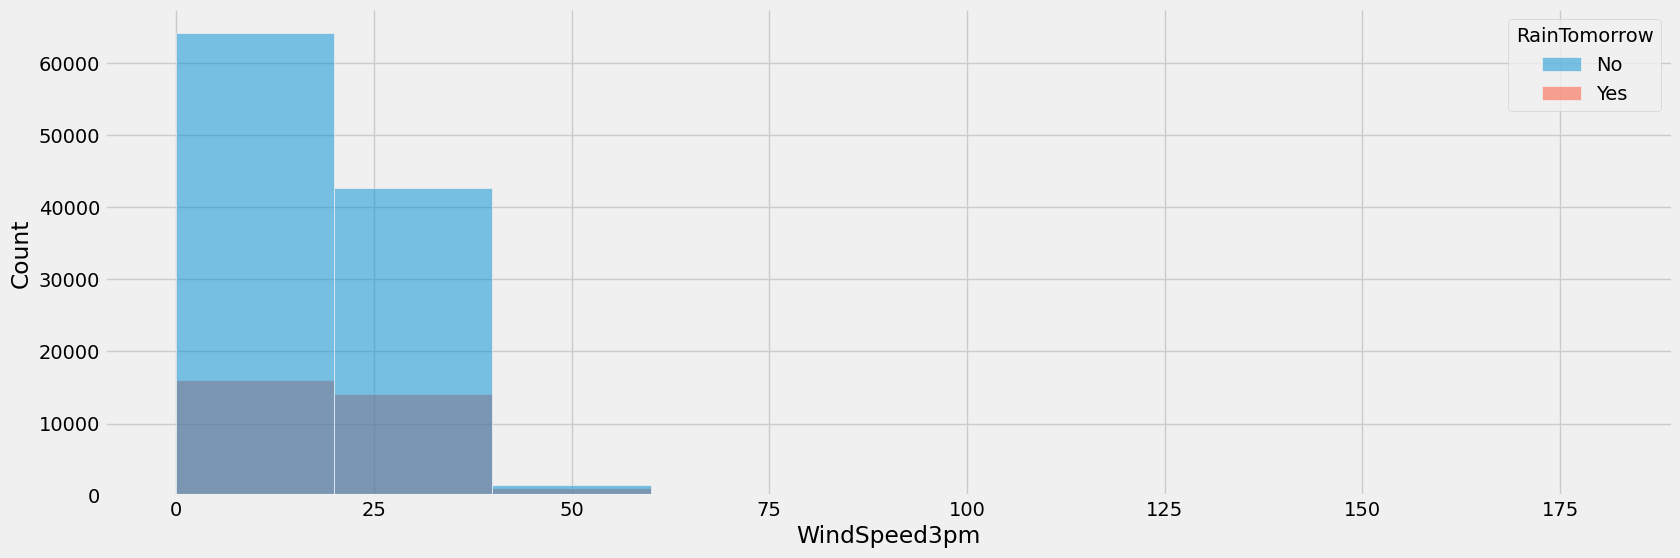

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plt.figure(figsize=(18, 6))
sns.histplot(data=cuaca_aus, x="WindSpeed3pm", bins=bins, hue="RainTomorrow");
sns.despine(top=True, right=True)

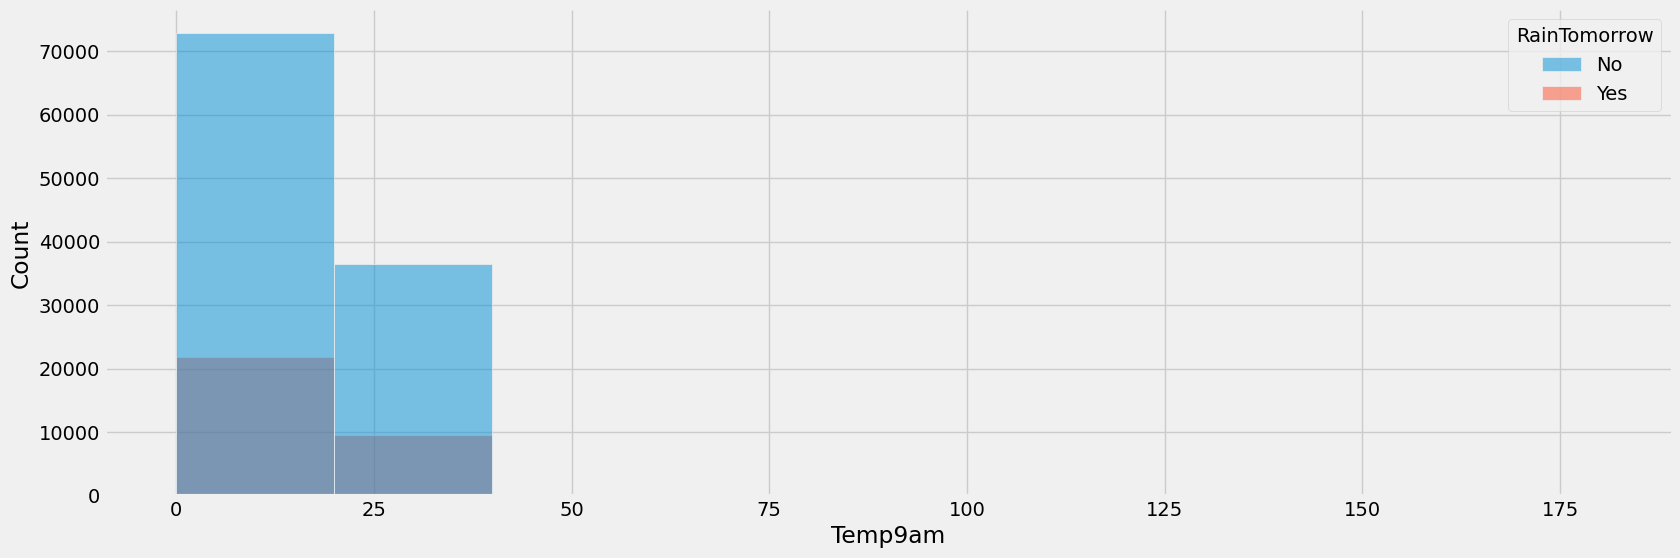

In [16]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plt.figure(figsize=(18, 6))
sns.histplot(data=cuaca_aus, x="Temp9am", bins=bins, hue="RainTomorrow");
sns.despine(top=True, right=True)

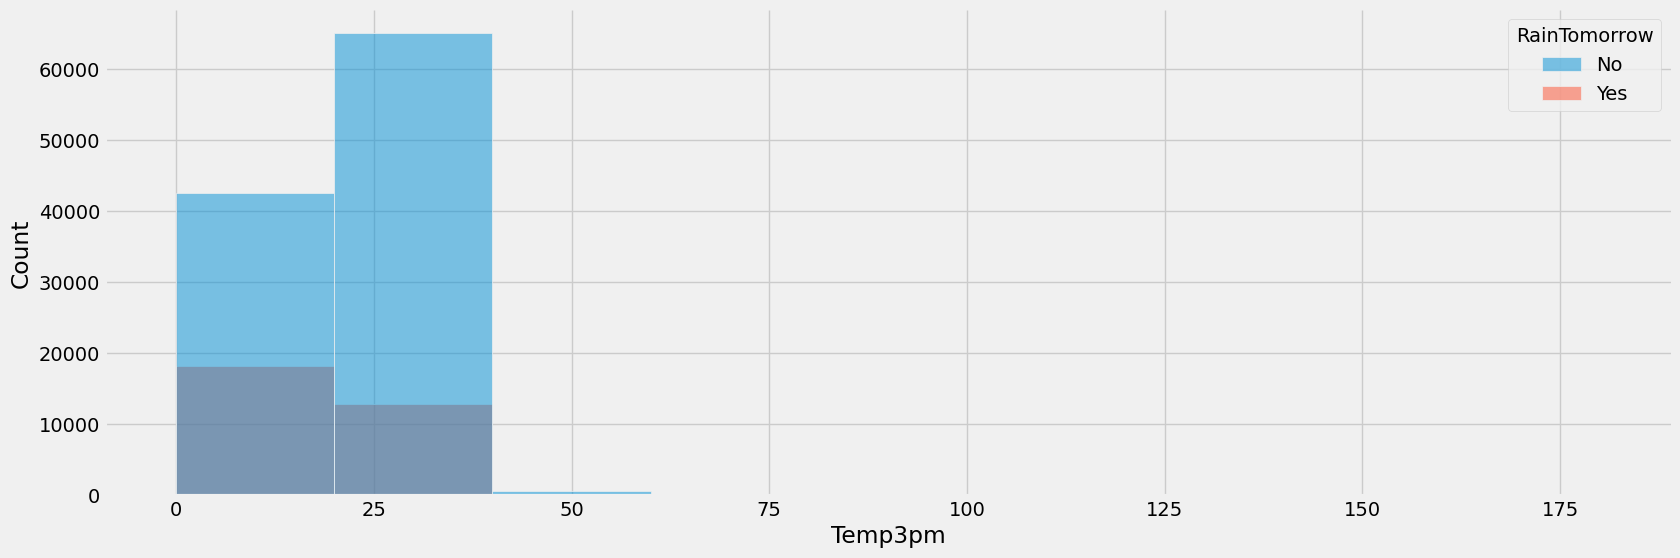

In [18]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plt.figure(figsize=(18, 6))
sns.histplot(data=cuaca_aus, x="Temp3pm", bins=bins, hue="RainTomorrow");
sns.despine(top=True, right=True)

In [19]:
both_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='Yes') & (cuaca_aus['RainTomorrow']=='Yes')]
both_not_rain =  cuaca_aus.loc[(cuaca_aus['RainToday']=='No') & (cuaca_aus['RainTomorrow']=='No')]
today_rain_tmr_not_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='Yes') & (cuaca_aus['RainTomorrow']=='No')]
today_not_rain_tmr_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='No') & (cuaca_aus['RainTomorrow']=='Yes')]
rain_tmr = cuaca_aus.loc[cuaca_aus['RainTomorrow']=='Yes']

print('both_days_rain:', both_rain['Date'].count())
print('both_days_not_rain:',  both_not_rain['Date'].count())
print('today_rain_tmr_not_rain:', today_rain_tmr_not_rain ['Date'].count())
print('today_not_rain_tmr_rain:', today_not_rain_tmr_rain ['Date'].count())
print('rain_tmr:', rain_tmr['Date'].count())

both_days_rain: 14597
both_days_not_rain: 92728
today_rain_tmr_not_rain: 16858
today_not_rain_tmr_rain: 16604
rain_tmr: 31877


*   14597 nilai dari kondisi hujan berdampingan selama 2 hari
*   Dari informasi ini dapat disimpulkan bahwa jika hari ini hujan, kemungkinan besar besok juga akan turun hujan

Text(0, 0.5, '% Raining days')

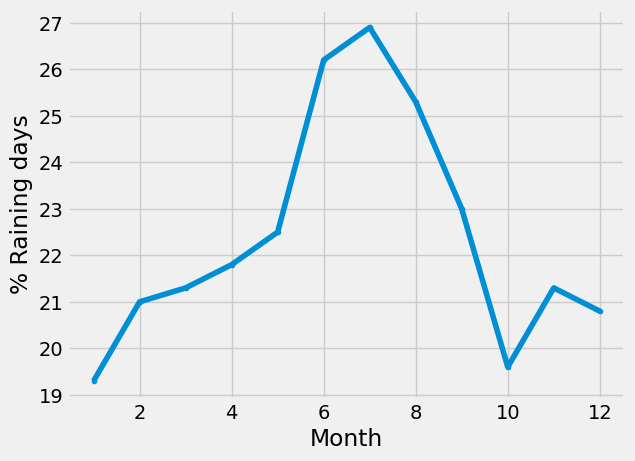

In [20]:
# Extract `Year` and 'Month' information from Date
cuaca_aus['Year'] = pd.DatetimeIndex(cuaca_aus['Date']).year
cuaca_aus['Month'] = pd.DatetimeIndex(cuaca_aus['Date']).month

rain_month = pd.crosstab(index=cuaca_aus['Month'], columns=cuaca_aus['RainTomorrow'], margins=True)
rain_month['%Yes'] = (rain_month['Yes'] / rain_month['All']).round(3)*100
rain_month.iloc[:-1,-1].plot(style='.-')
plt.xlabel('Month')
plt.ylabel('% Raining days')

Dari hasil visualisasi terlihat bahwa intensitas hujan lebih sering turun ada pada rentang bulan Juni hingga mendekati Agustus

###2.3 Kesimpulan EDA

Kemungkinan besar turun hujan besok, jika:

*   Tingkat kelembapan tinggi (Humidity)
*   Tingkat tekanan rendah (Pressure)
* Evaporasi Tinggi
* Keadaan gumpalan awan banyak
*   Hari ini turun hujan
*   Bulan Juni, Juli, Agustus.





#Kasus Penyakit Jantung

##1. Loading Data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
hrt_ori = pd.read_csv ('heart_failure_clinical_records_dataset.csv')

In [ ]:
hrt = hrt_ori.copy()
hrt.shape

(299, 13)

In [ ]:
hrt.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##2. Data Preparation

In [ ]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(hrt.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(hrt)).round(2)*100
mv

,No. of missing values,% missing_values
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


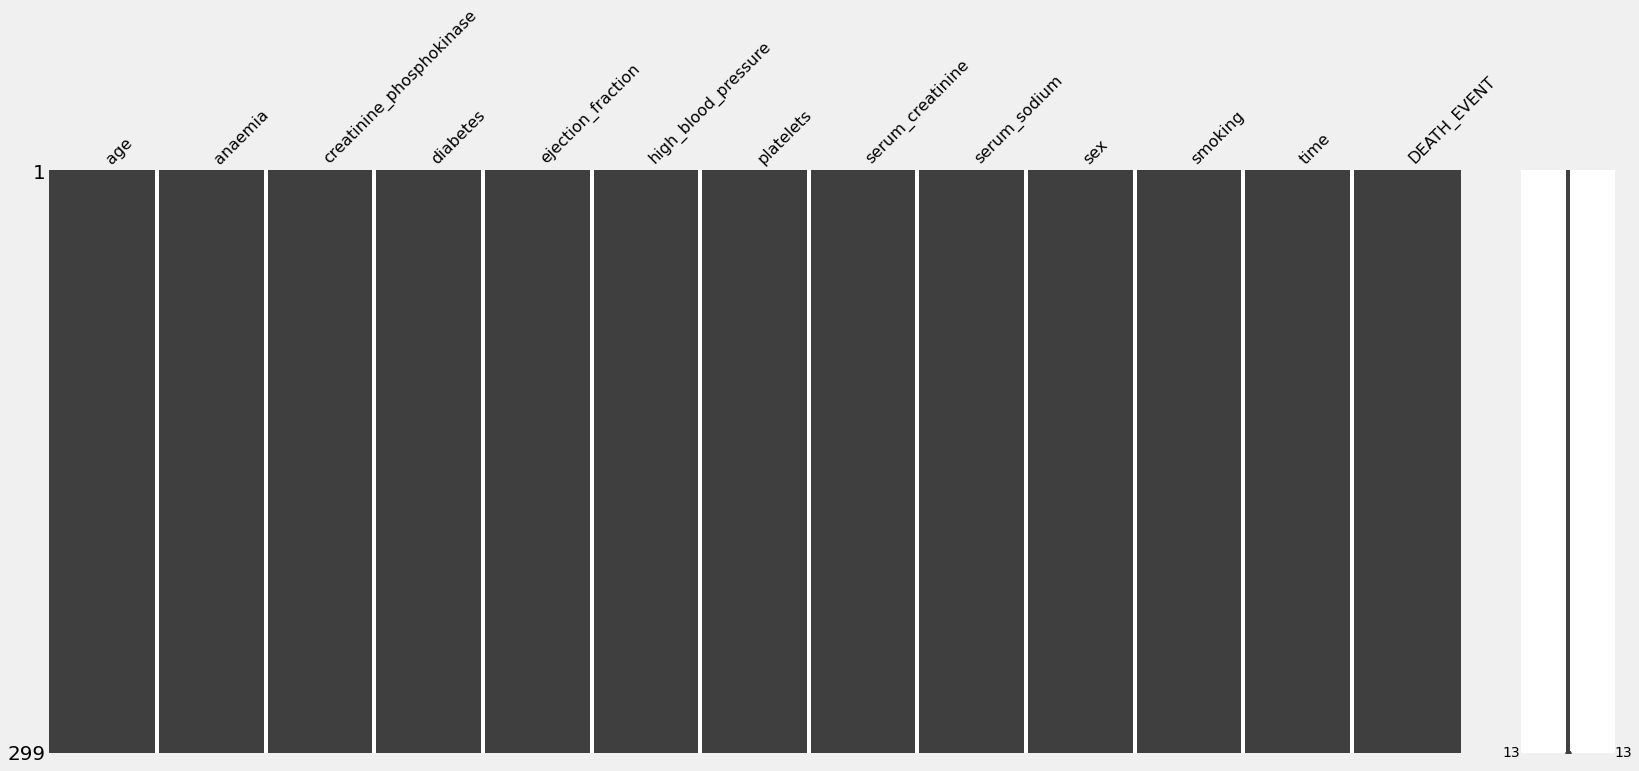

In [ ]:
import missingno as msno

msno.matrix(hrt)  # just to visualize. no missing value.

Tampaknya dataset yang akan digunakan bersih dari missing value.

##3. Data Exploring

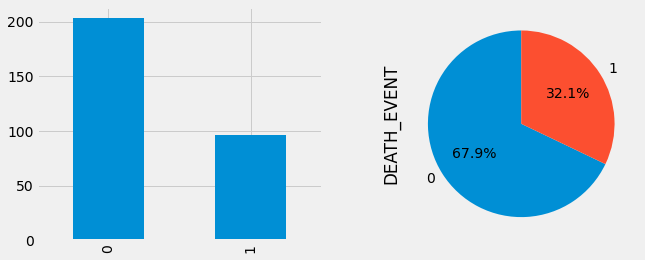

In [ ]:
'''
Visualisasi variabel target (y)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
hrt['DEATH_EVENT'].value_counts().plot(kind='bar', ax=axs[0])
hrt['DEATH_EVENT'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

*   Target dari variabel DEATH_EVENT memiliki 2 value, yaitu 0 (No) and 1 (Yes)
*   67.9% dari hasilnya adalah No, dan 32.1% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu dihandle

In [ ]:
countNoDisease = len(hrt[hrt.DEATH_EVENT == 0])
countHaveDisease = len(hrt[hrt.DEATH_EVENT == 1])
print("Percentage of Patients Haven't Heart Failure: {:.2f}%".format((countNoDisease / (len(hrt.DEATH_EVENT))*100)))
print("Percentage of Patients Have Heart Failure: {:.2f}%".format((countHaveDisease / (len(hrt.DEATH_EVENT))*100)))

Percentage of Patients Haven't Heart Failure: 67.89%
Percentage of Patients Have Heart Failure: 32.11%


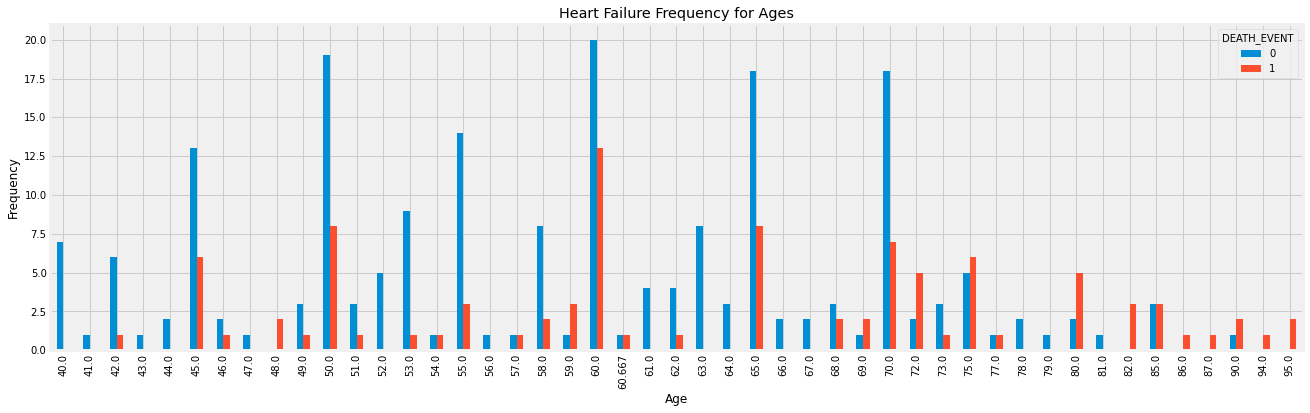

In [ ]:
pd.crosstab(hrt.age,hrt.DEATH_EVENT).plot(kind="bar",figsize=(20,6))
plt.title('Heart Failure Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Pasien dengan penyakit jantung mengalami kematian pada rentang usia >= 45 tahun. **Pasien penyakit jantung diatas 45 tahun memiliki resiko kematian yang lebih besar.**

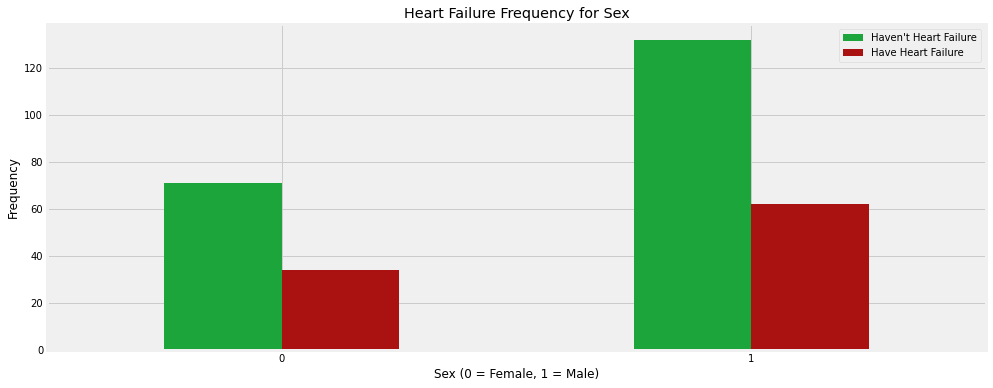

In [ ]:
pd.crosstab(hrt.sex, hrt.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Failure Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Heart Failure", "Have Heart Failure"])
plt.ylabel('Frequency')
plt.show()

*   Pasien dengan penyakit jantung lebih banyak didominasi oleh pasien pria
*   Pasien pria dengan penyakit jantung memiliki potensi yang lebih besar dalam mengalami kematian.



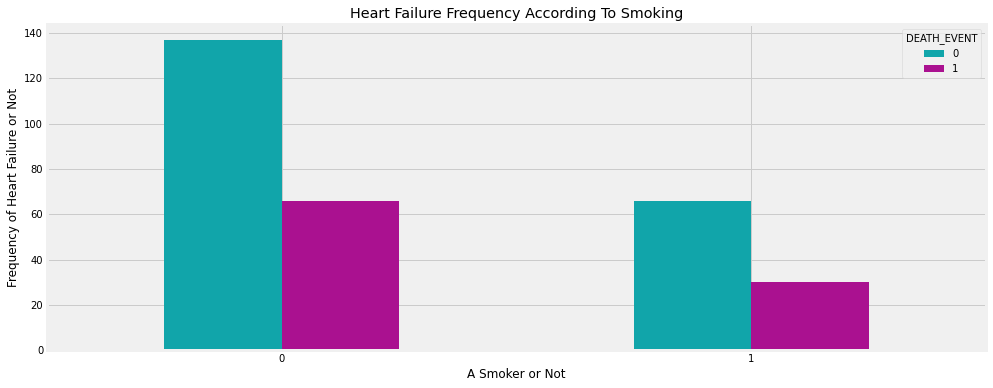

In [ ]:
pd.crosstab(hrt.smoking, hrt.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Failure Frequency According To Smoking')
plt.xlabel('A Smoker or Not')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Failure or Not')
plt.show()

*   Bukan perokok lebih banyak mengalami kematian
*   Perokok memiliki tingkat kematian lebih sedikit
*   Dalam kasus penyakit jantung status sebagai seorang perokok tidak berpengaruh dalam terjadinya kematian.





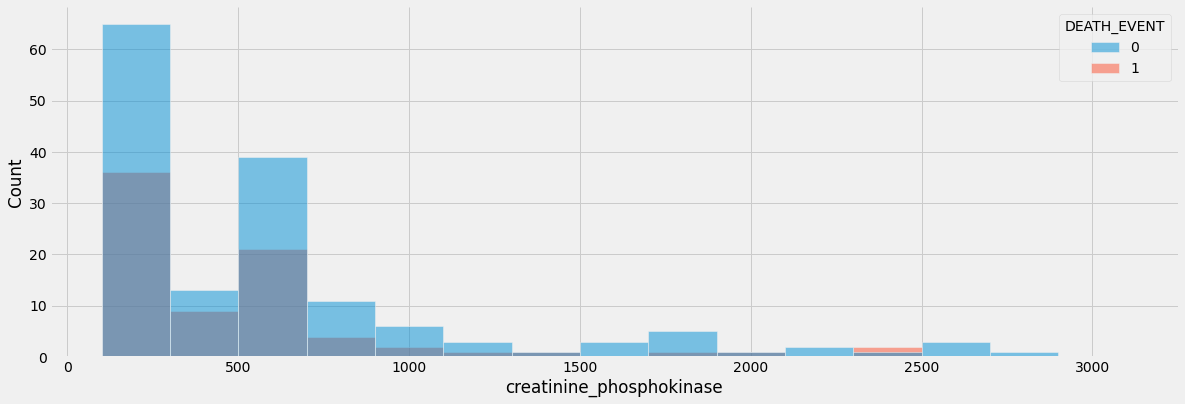

In [ ]:
bins = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500, 2700, 2900, 3100]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="creatinine_phosphokinase", bins=bins, hue="DEATH_EVENT");
sns.despine(top=True, right=True)

**Pada kondisi normal, kadar kreatin fosfokinase tergolong rendah dalam darah. Kadarnya yang tinggi mengindikasikan adanya cedera pada jaringan otot, jantung, atau otak. Semakin tinggi creatinine maka semakin berpotensi seseorang mengalami kerusakan jantung dan semakin tinggi resiko kematian.**

Dari visualisasi terbukti bahwa pasien dengan kadar keratin fosfokinase diatas 2000 mengalami kematian.

Semakin tinggi kadar keratin fosfokinasi semakin besar resiko pasien penyakit jantung mengalami kematian.

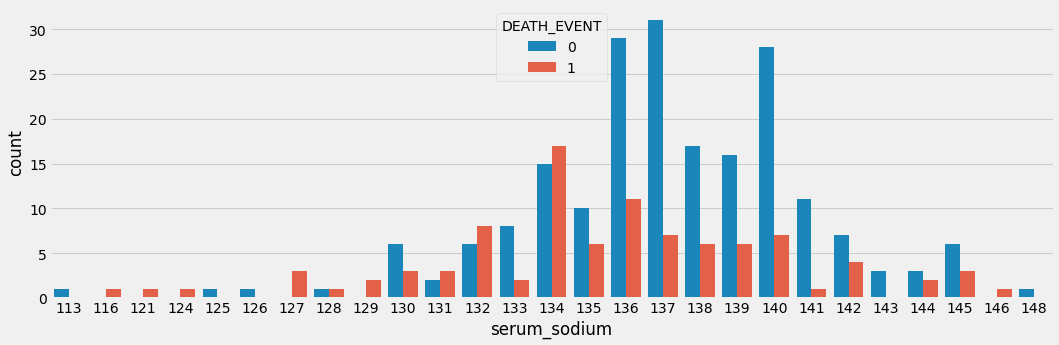

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="serum_sodium", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

**Dai-Yin Lu dkk dan Byung-Su Yoo dkk menunjukkan bahwa rendahnya kadar natrium pada darah atau kadar natrium dibawah 135 mEq/L dapat dihubungkan dengan peningkatan kematian pasien dengan gagal jantung akut.**

Dari visualisasi terbukti bahwa tinggi rendahnya kadar natrium pada darah berpengaruh dalam terjadinya kematian pada pasien penyakit jantung.

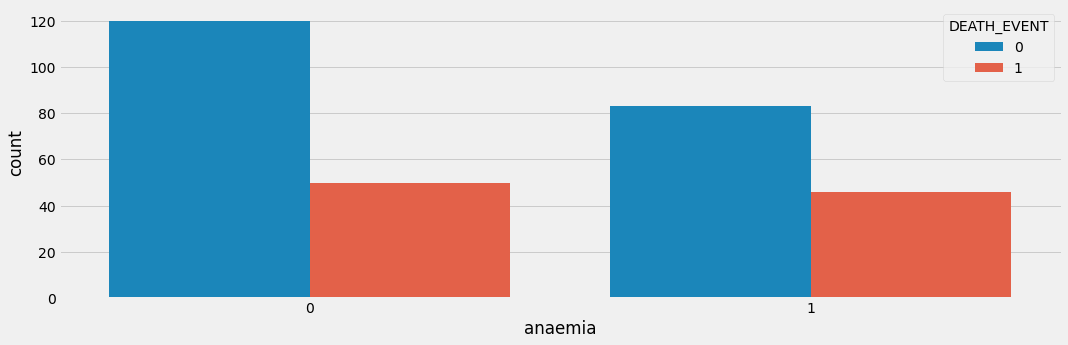

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="anaemia", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

*   Pasien penyakit jantung tanpa anemia lebih banyak mengalami kematian
*   Penyakit anemia yang diderita pasien penyakit jantung tidak berpengaruh dalam terjadinya kematian.



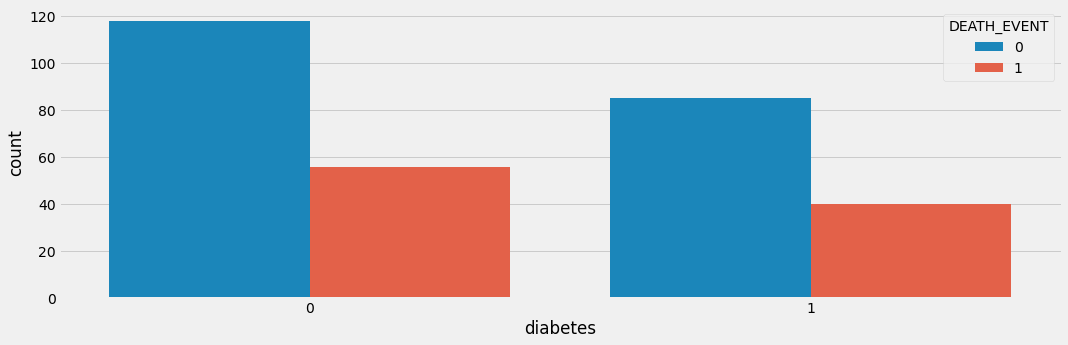

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="diabetes", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

*   Pasien penyakit jantung tanpa diabetes lebih banyak mengalami kematian
*   Penyakit diabetes yang diderita pasien penyakit jantung tidak berpengaruh dalam terjadinya kematian.

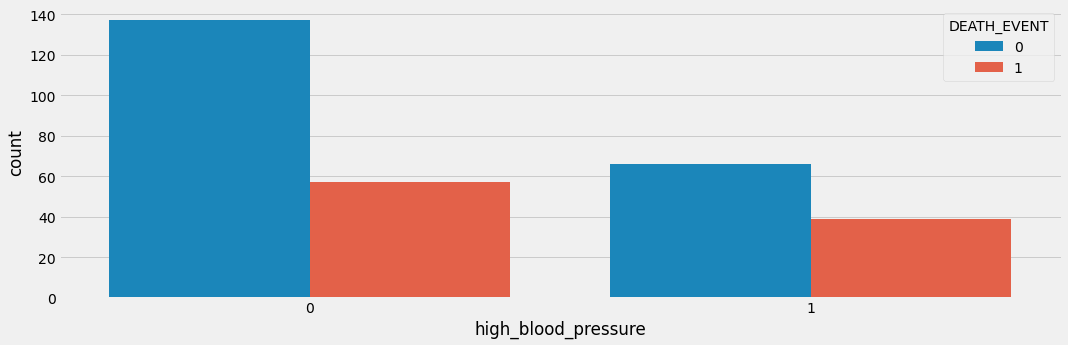

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="high_blood_pressure", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

*   Pasien penyakit jantung tanpa tekanan darah tinggi lebih banyak mengalami kematian
*   Tekanan darah tinggi yang dimiliki pasien penyakit jantung tidak berpengaruh dalam terjadinya kematian.

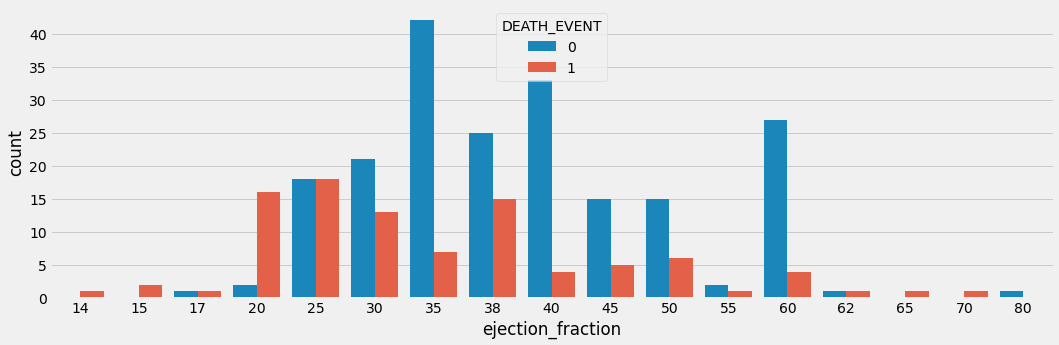

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="ejection_fraction", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

EF <40 menunjukan adanya gagal jantung atau kardiomiopati. EF 15% menunjukan adanya gagal jantung berat. Sehingga orang dengan EF 15% berisiko lebih tinggi terjadi nya gangguan irama jantung yang mengancam nyawa yang dapat menyebabkan kematian mendadak.

**Terbukti dari hasil visualisasi menunjukkan bahwa pasian dengan EF <40 mengalami kematian lebih banyak dibandingkan >= 40**

**Semakin kecil ejection_fraction, semakin besar resiko pasien jantung mengalami kematian**

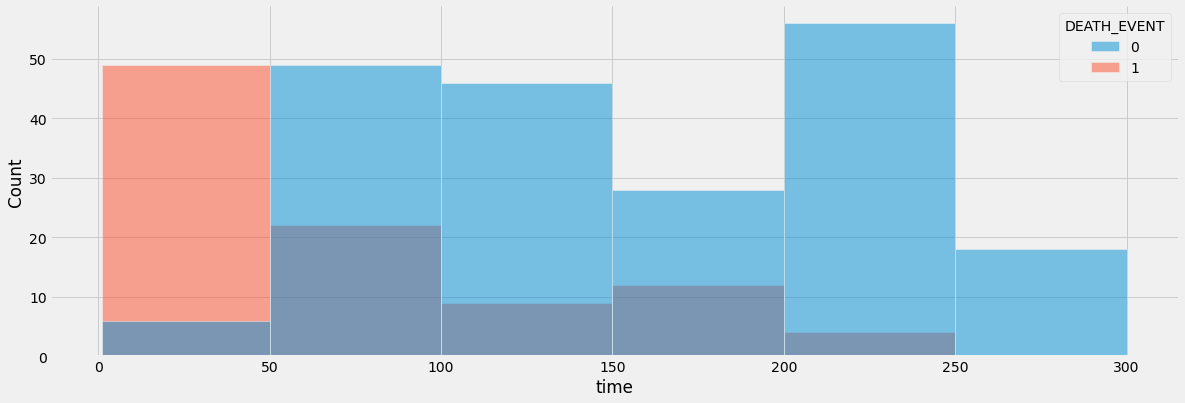

In [ ]:
bins = [1, 50, 100, 150, 200, 250, 300]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="time", bins=bins, hue="DEATH_EVENT");
sns.despine(top=True, right=True)

Periode tindak lanjut memiliki pengaruh dalam terjadinya kematian. Semakin kecil periode tindak lanjut dilakukan semakin besar resiko kematian pada pasien penyakit jantung.

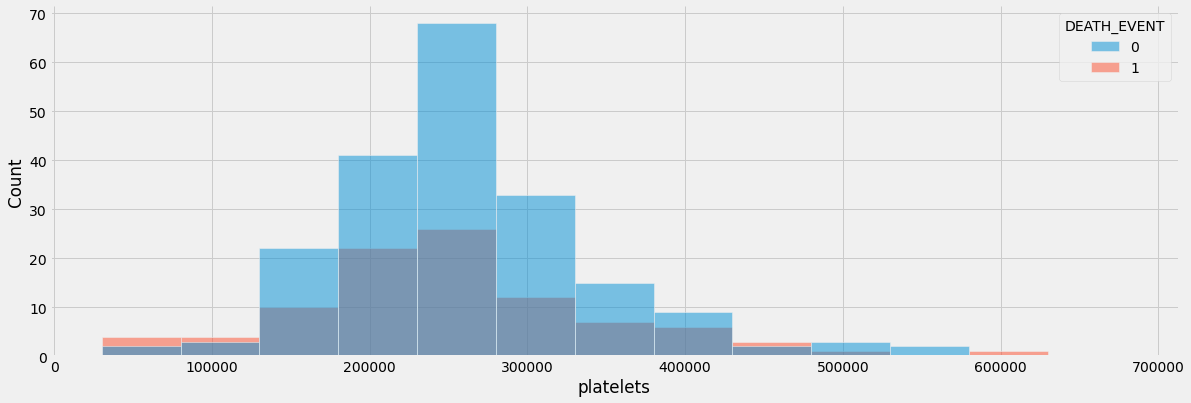

In [ ]:
bins = [30000, 80000, 130000, 180000, 230000, 280000, 330000, 380000, 430000, 480000, 530000, 580000, 630000, 680000]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="platelets", bins=bins, hue="DEATH_EVENT");
sns.despine(top=True, right=True)

**Jumlah normal trombosit dalam darah manusia adalah 150.000–450.000 per mikroliter darah**. Dari visualisasi terbukti bahwa pasien dengan trombosit dibawah 150.000 dan diatas 450.000 mengalami kematian.

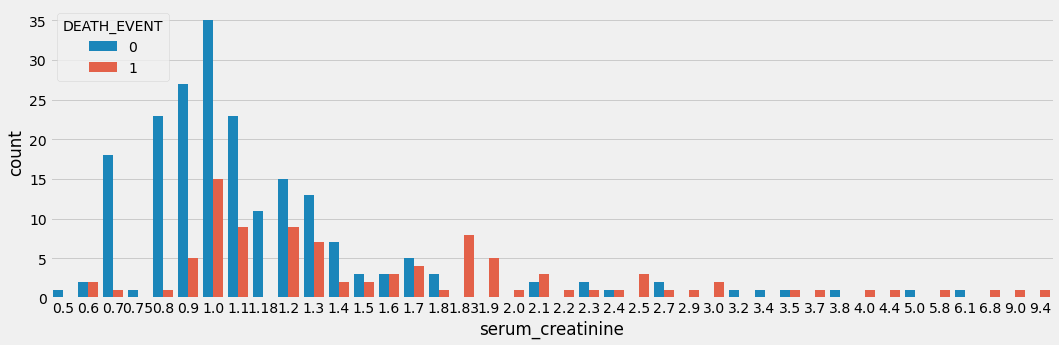

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="serum_creatinine", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

**Normal kreatinin dalam darah adalah 0.6 - 1.2 miligram per deciliter (mg/dL) untuk pria dewasa dan 0.5 - 1.1 (mg/dL) untuk wanita dewasa**. Dari visualisasi terlihat bahwa tinggi rendahnya kadar kreatinin tidak memiliki pengaruh yang besar dalam terjadinya kematian.

**KESIMPULAN ANALYSIS EDA**
---
*   Target dari variabel DEATH_EVENT memiliki 2 value, yaitu 0 (No) and 1 (Yes)
*   67.9% dari hasilnya adalah No, dan 32.1% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu digunakan stratified agar menjaga keseimbangan data pada target.
---
**Terjadinya kematian pada pasien penyakit jantung berdasarkan analysis EDA dipengaruhi oleh:**
*   Pasien penyakit jantung diatas 45 tahun memiliki resiko kematian yang lebih besar.
*   Pasien pria dengan penyakit jantung memiliki potensi yang lebih besar dalam mengalami kematian.
*   Semakin tinggi kadar keratin fosfokinasi semakin besar resiko pasien penyakit jantung mengalami kematian.
*   Tinggi rendahnya kadar natrium pada darah berpengaruh dalam terjadinya kematian pada pasien penyakit jantung.
*   Semakin kecil ejection_fraction, semakin besar resiko pasien jantung mengalami kematian
*   Semakin kecil periode tindak lanjut dilakukan semakin besar resiko kematian pada pasien penyakit jantung.
*   Pasien dengan trombosit dibawah 150.000 dan diatas 450.000 memiliki resiko yang sangat besar dalam mengalami kematian.








